const  std::vector < std::array<float, 3>> points2d = {
        {0.25f, 0.25f, 0.0f},
        {0.75f, 0.26f, 0.0f},
        {0.75f, 0.24f, 0.0f},
        {0.25f, 0.72f, 0.0f},
        {0.27f, 0.75f, 0.0f},
        {0.23f, 0.77f, 0.0f},

};

const uint32_t NUM_ELEMENTS = size(points2d);

const uint32_t NUM_LBVH_ELEMENTS = NUM_ELEMENTS + NUM_ELEMENTS - 1;

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 'L4', 20: 'L18', 21: 'L9', 22: 'L12', 23: 'L3', 24: 'L2', 25: 'L14', 26: 'L11', 27: 'L19', 28: 'L13', 29: 'L8', 30: 'L5', 31: 'L6', 32: 'L1', 33: 'L17', 34: 'L15', 35: 'L7', 36: 'L0', 37: 'L10', 38: 'L16'}


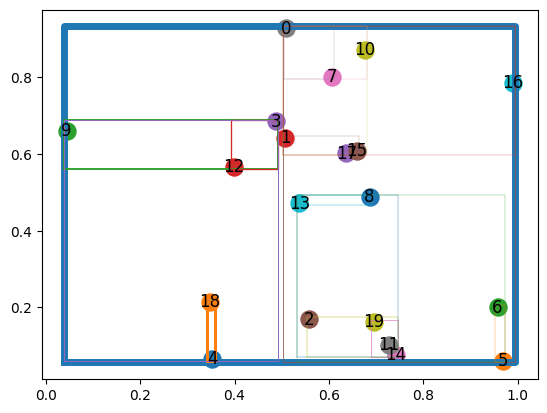

In [8]:
import csv, numpy as np
import matplotlib.pyplot as plt
leaf_map ={}
leaf_nodes = []
edges = []
with open(r'e:\relocated\Downloads\connections.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for i,row in enumerate(reader):
        leaf_map[i] = i
        #print(row)
        element = int(row['Element'])
        primitiveIdx = int(row[' g_lbvh.primitiveIdx'])
        left = int(row[' g_lbvh.left'])
        right = int(row[' g_lbvh.right'])
        x0 = float(row[' g_lbvh.aabbMinX'])
        y0 = float(row[' g_lbvh.aabbMinY'])
        x1 = float(row[' g_lbvh.aabbMaxX'])
        y1 = float(row[' g_lbvh.aabbMaxY'])
        xy = [[x0, x1, x1, x0, x0], [y0, y0, y1, y1, y0]]
        
        lw = 2
        x,y = (0.5*(x0+x1), 0.5*(y0+y1))
        if left == right == 0:
            leaf_nodes.append(f'L{primitiveIdx}')
            leaf_map[element] = f'L{primitiveIdx}'
            plt.scatter([x], [y], label = i, s = 150)

            plt.annotate(primitiveIdx, # this is the text
                        (x,y), # these are the coordinates to position the label
                        textcoords="offset points", # how to position the text
                        xytext=(0,0), # distance from text to points (x,y)
                        ha='center',
                        va = 'center',
                        fontsize = 12)
        else:
            edges.append((element, left   ))
            edges.append((element, right  ))
    
        # boxes.append(xy)
        plt.plot(*xy, linewidth = 5*(i+1)**(-1.2))

print(leaf_map)
edges = [(x,leaf_map[y]) for x,y in edges]

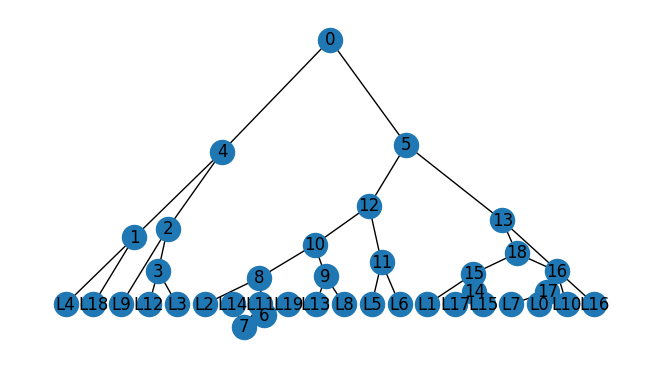

In [7]:
import networkx as nx
# set fixed root and leaf node position (leafs in a line)
leaf_pos = np.linspace(-4,4, len(leaf_nodes))
posLeaf = {x:np.array([y,0.0]) for x,y in zip(leaf_nodes, leaf_pos)}
posLeaf[0] = np.array([np.mean(leaf_pos), 4.0])

G = nx.Graph()
G.add_edges_from(edges)
nodes = list(nx.nodes(G))
angles = 2*np.pi/len(nodes)*np.arange(len(nodes))

# pre generate arbitaray starting pos
posOG = [np.array([np.cos(a), np.sin(a)]) for a in angles]
posOG = {n: p for n,p in zip(nodes,posOG)}
for n,p in posLeaf.items():
    posOG[n] = p

pos = nx.spring_layout(G,pos=posOG, fixed=posLeaf.keys(), k = 0.3)

nx.draw(G, pos = pos, with_labels = True)
plt.gca().set_aspect(1)
#posOG